In [27]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Variables
There are 14 attributes in each case of the dataset. They are:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's


In [14]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 

In [15]:
data.shape

(506, 14)

In [16]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [17]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [19]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


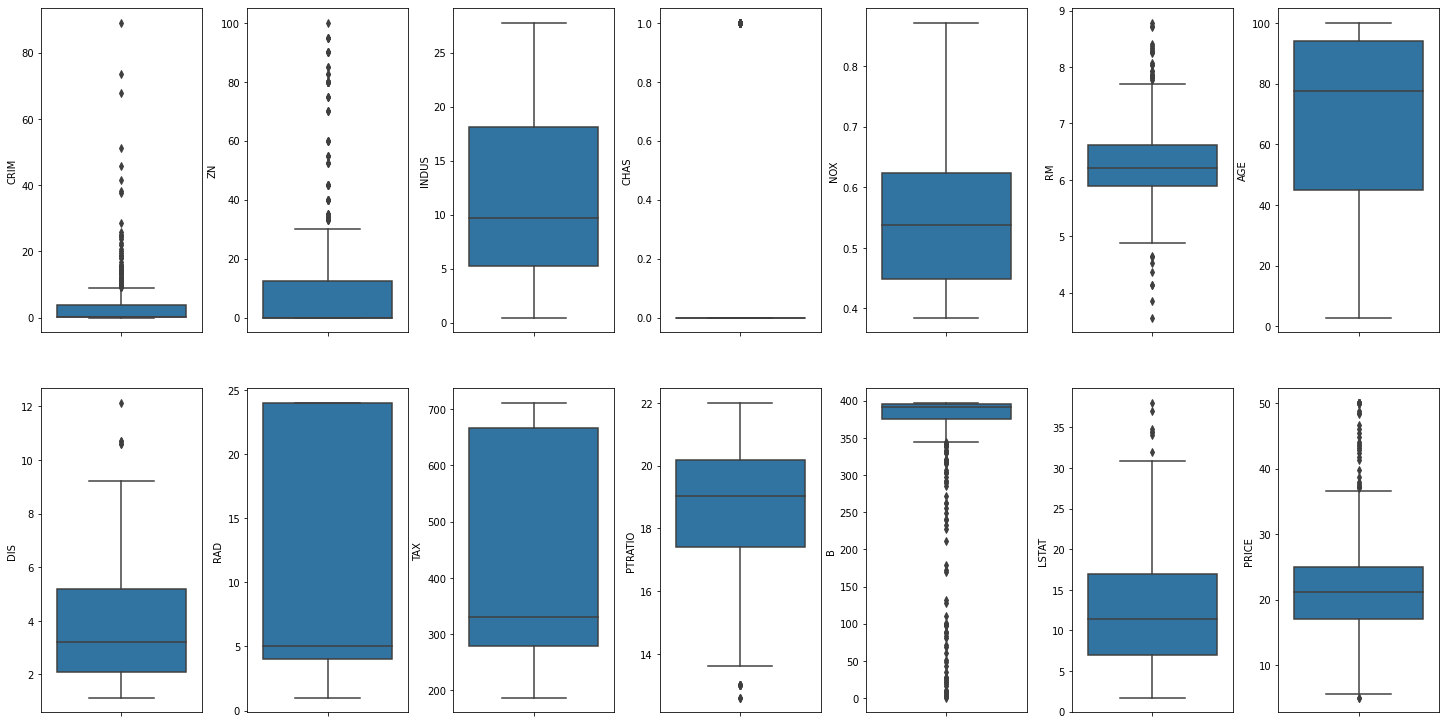

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [21]:
# Correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

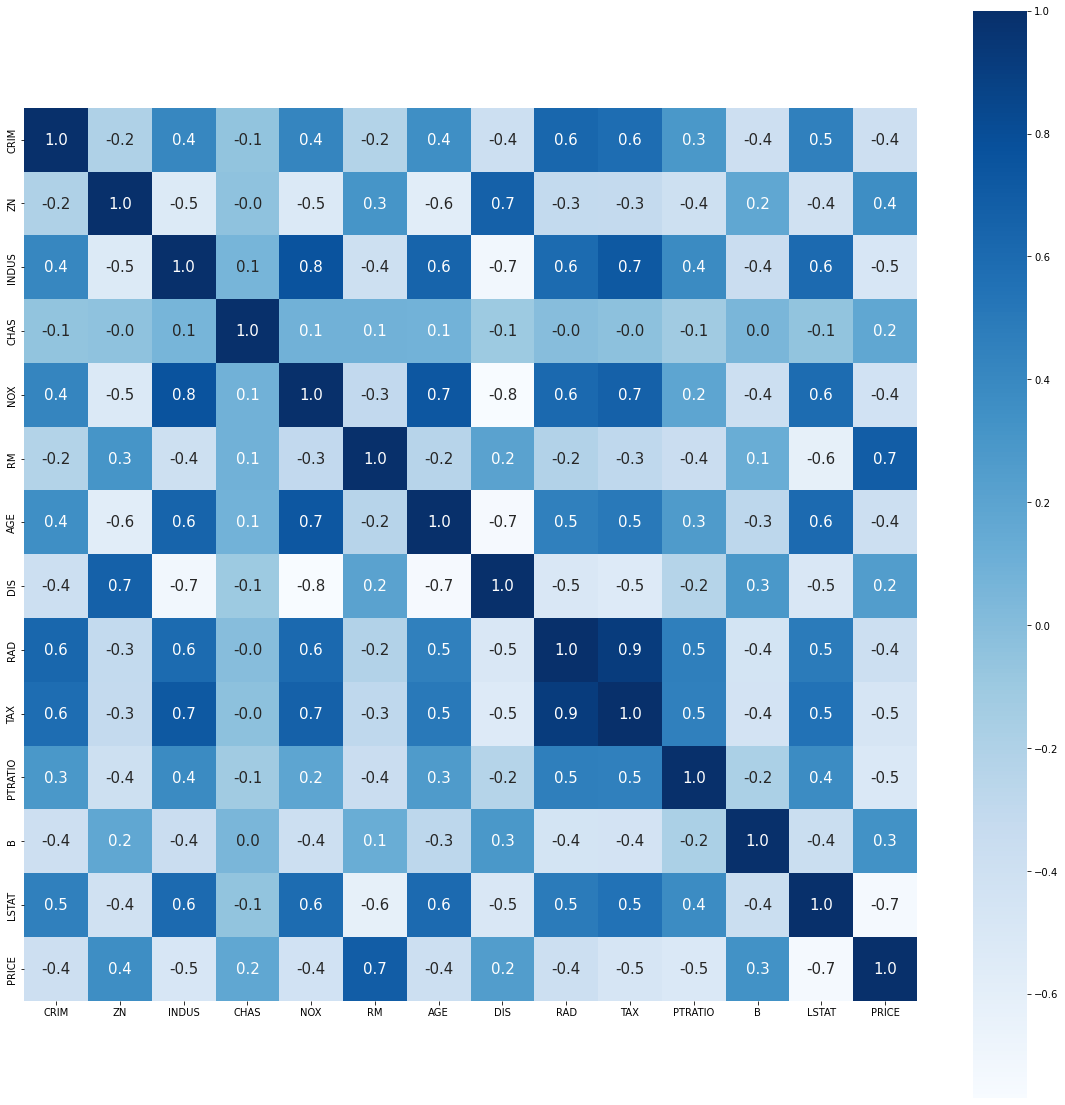

In [25]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [29]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 99)

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()

# Train the model
linearReg.fit(X_train, y_train)

LinearRegression()

In [31]:
linearReg.intercept_

35.31920202133176

In [33]:
#Converting the coefficient values to a dataframe
coeff = pd.DataFrame([X_train.columns,linearReg.coef_]).T
coeff = coeff.rename(columns={0: 'Attribute', 1: 'Coefficients'})

In [34]:
coeff

,Attribute,Coefficients
0,CRIM,-0.123723
1,ZN,0.048068
2,INDUS,0.021077
3,CHAS,1.916146
4,NOX,-14.521411
5,RM,3.855672
6,AGE,-0.000016
7,DIS,-1.465362
8,RAD,0.273514
9,TAX,-0.011936


In [49]:
# Model prediction on train data
y_pred = linearReg.predict(X_train)

In [50]:
# Model Evaluation on train data
print('R^2:\t',metrics.r2_score(y_train, y_pred))
print('MAE:\t',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:\t',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:	 0.7576598542832372
MAE:	 3.1665354888033335
MSE:	 19.869083810658235
RMSE:	 4.457475048798169


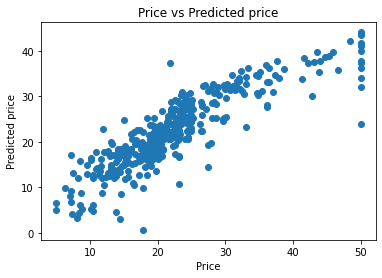

In [54]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted price")
plt.title("Price vs Predicted price")


plt.show()

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted price")
plt.title("Price vs Predicted price")

plt.show()

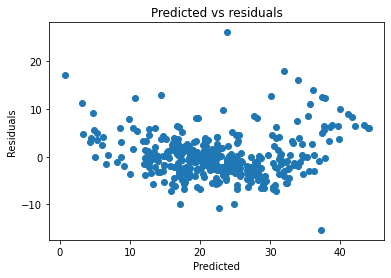

In [42]:
# Checking residuals for homoskedacity
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

C:\Users\karth\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


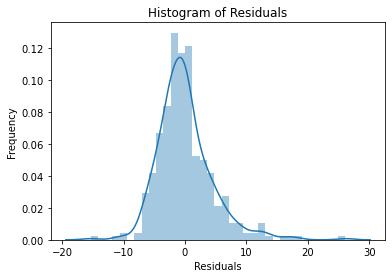

In [43]:
# Checking for Normality of residuals
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [56]:
# Model prediction on test data
y_pred_test = linearReg.predict(X_test)

In [67]:
# Model Evaluation on test data
print('R^2:\t',metrics.r2_score(y_test, y_pred_test))
print('MAE:\t',metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:\t',metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2:	 0.6674690355194668
MAE:	 3.628432795511119
MSE:	 30.966566999848776
RMSE:	 5.564761180845839


In [65]:
linearReg_r2 = metrics.r2_score(y_test, y_pred_test)

In [91]:
linearReg_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

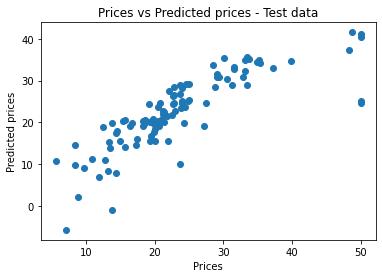

In [95]:
# Visualizing the differences between actual prices and predicted values for test data
plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices - Test data")
plt.show()

# Random Forest

In [63]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Train the model using the training sets 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
# Model prediction on train data
y_pred_rf = rf.predict(X_train)

In [72]:
# Model Evaluation on train data
print('R^2:\t',metrics.r2_score(y_train, y_pred_rf))
print('MAE:\t',metrics.mean_absolute_error(y_train, y_pred_rf))
print('MSE:\t',metrics.mean_squared_error(y_train, y_pred_rf))
print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf)))

R^2:	 0.9810977719564008
MAE:	 0.8390544554455435
MSE:	 1.5497636683168325
RMSE:	 1.244895043092723


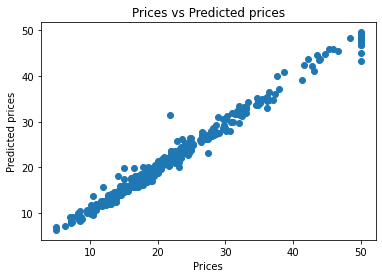

In [73]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred_rf)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [66]:
# Predicting Test data with the model
y_test_pred_rf = rf.predict(X_test)

In [68]:
# Model Evaluation on train data
print('R^2:\t',metrics.r2_score(y_test, y_test_pred_rf))
print('MAE:\t',metrics.mean_absolute_error(y_test, y_test_pred_rf))
print('MSE:\t',metrics.mean_squared_error(y_test, y_test_pred_rf))
print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf)))

R^2:	 0.8308457348251862
MAE:	 2.0883725490196072
MSE:	 15.752298117647044
RMSE:	 3.968916491644419


In [70]:
rf_r2 = metrics.r2_score(y_test, y_test_pred_rf)

In [92]:
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))

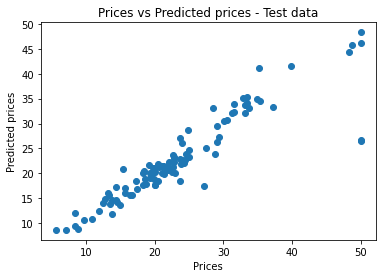

In [75]:
# Visualizing the differences between actual prices and predicted values for test data
plt.scatter(y_test, y_test_pred_rf)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices - Test data")
plt.show()

# XG Boost

In [80]:
from xgboost import XGBRegressor

'''xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)'''
xgbr = XGBRegressor()

# Train the model using the training sets 
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [81]:
# Model prediction on train data
y_pred_xgbr = xgbr.predict(X_train)

In [82]:
# Model Evaluation on train data
print('R^2:\t',metrics.r2_score(y_train, y_pred_xgbr))
print('MAE:\t',metrics.mean_absolute_error(y_train, y_pred_xgbr))
print('MSE:\t',metrics.mean_squared_error(y_train, y_pred_xgbr))
print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xgbr)))

R^2:	 0.9999946351186934
MAE:	 0.014389334810842433
MSE:	 0.00043985810110265246
RMSE:	 0.020972794308404697


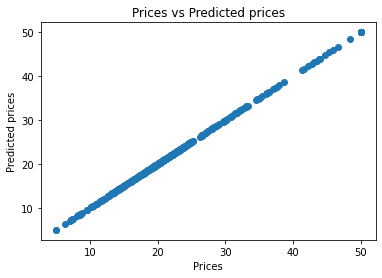

In [88]:
# Visualizing the differences between actual prices and predicted values - Train data
plt.scatter(y_train, y_pred_xgbr)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [84]:
# Model prediction on test data
y_test_pred_xgbr = xgbr.predict(X_test)

In [86]:
# Model Evaluation on train data
print('R^2:\t',metrics.r2_score(y_test, y_test_pred_xgbr))
print('MAE:\t',metrics.mean_absolute_error(y_test, y_test_pred_xgbr))
print('MSE:\t',metrics.mean_squared_error(y_test, y_test_pred_xgbr))
print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgbr)))

R^2:	 0.8228340802124513
MAE:	 2.3371769624597882
MSE:	 16.49837432060295
RMSE:	 4.061819090087956


In [89]:
xgbr_r2 = metrics.r2_score(y_test, y_test_pred_xgbr)

In [93]:
xgbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgbr))

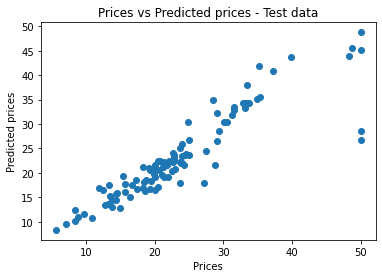

In [87]:
# Visualizing the differences between actual prices and predicted values for test data
plt.scatter(y_test, y_test_pred_xgbr)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices - Test data")
plt.show()

# Comparing model performance

In [94]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [linearReg_r2, rf_r2, xgbr_r2],
    'RMSE Score': [linearReg_rmse, rf_rmse, xgbr_rmse]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,RMSE Score
1,Random Forest,0.830846,3.968916
2,XGBoost,0.822834,4.061819
0,Linear Regression,0.667469,5.564761


R-squared (Coefficient of Determination):
R-squared measures the proportion of the variance for the dependent variable that's explained by independent variables in a regression model. It ranges from 0 to 1, with 1 indicating a perfect fit.

Root Mean Squared Error (RMSE):
RMSE measures the average magnitude of the errors between predicted and observed values, with a higher penalty for larger errors. A smaller RMSE indicates a better fit to the data, while a larger RMSE indicates a poorer fit.
